# Drought Track Directions
a. stein 6.20.2023

Get directions from the u/v vectors of the drought tracks.

In [1]:
import pickle
import numpy as np

import sys
sys.path.append('../../../')
import ndrought.drought_network as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/drought_tracks/../../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dt_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/drought_tracks'

In [3]:
exp_tag = 'f25k_d1_rt20p_paired'
#exp_tag = 'f25k_d2_rt20p_paired'

In [4]:
usdm_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/USDM_tracks_{exp_tag}.pickle')

In [5]:
usdm_dtd = dnw.prune_tracks(usdm_dtd)

In [6]:
spi30d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_30d_tracks_{exp_tag}.pickle')

In [7]:
spi30d_dtd = dnw.prune_tracks(spi30d_dtd)

In [8]:
spi180d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_180d_tracks_{exp_tag}.pickle')

In [9]:
spi180d_dtd = dnw.prune_tracks(spi180d_dtd)

Let's try to get our angles out

In [10]:
np.arctan?

Call signature:  np.arctan(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'arctan'>
File:            /pool0/data/steinadi/.conda/envs/sedi/lib/python3.10/site-packages/numpy/__init__.py
Docstring:      
arctan(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric inverse tangent, element-wise.

The inverse of tan, so that if ``y = tan(x)`` then ``x = arctan(y)``.

Parameters
----------
x : array_like
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc res

In [11]:
u = usdm_dtd['u'][0]
u

array([ 0.00000000e+00,  3.44377699e+04,  1.69993443e+04,  1.72364324e+05,
        1.11676670e+03, -2.04169293e+03, -3.58595732e+04, -5.26026871e+02,
        1.70969125e+04,  1.91110036e+01, -6.28372096e+04, -1.22392875e+04,
        3.01750773e+04,  0.00000000e+00, -1.20636751e+04, -2.55559198e+04,
        1.98630691e+02,  0.00000000e+00,  2.24938595e+03])

In [12]:
v = usdm_dtd['v'][0]
v

array([ 0.00000000e+00,  9.47809438e+02, -7.25368850e+03, -2.02813769e+04,
        5.45326935e+03, -1.94581060e+04,  1.79864362e+04,  3.86080948e+03,
        1.58715853e+03,  1.61678021e+01,  5.72859967e+03,  5.91137204e+03,
        8.75469794e+04,  0.00000000e+00,  1.50742523e+04,  1.04504323e+04,
        5.70894846e+03,  0.00000000e+00,  7.01896869e+03])

u, v = future - current

In [13]:
-0.8 - -1.2

0.3999999999999999

Positive u = eastward movement    
Negative u = westward movement

Positive v = northward movement    
Negative v = southward movement

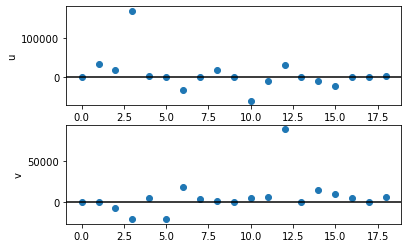

In [14]:
fig, axs = plt.subplots(2,1)

dexes = np.arange(len(u))
axs[0].scatter(dexes, u)
axs[1].scatter(dexes, v)
axs[0].set_ylabel('u')
axs[1].set_ylabel('v')

for ax in axs:
    ax.axhline(0, color='k')

In [32]:
u

array([ 0.00000000e+00,  3.44377699e+04,  1.69993443e+04,  1.72364324e+05,
        1.11676670e+03, -2.04169293e+03, -3.58595732e+04, -5.26026871e+02,
        1.70969125e+04,  1.91110036e+01, -6.28372096e+04, -1.22392875e+04,
        3.01750773e+04,  0.00000000e+00, -1.20636751e+04, -2.55559198e+04,
        1.98630691e+02,  0.00000000e+00,  2.24938595e+03])

In [15]:
v

array([ 0.00000000e+00,  9.47809438e+02, -7.25368850e+03, -2.02813769e+04,
        5.45326935e+03, -1.94581060e+04,  1.79864362e+04,  3.86080948e+03,
        1.58715853e+03,  1.61678021e+01,  5.72859967e+03,  5.91137204e+03,
        8.75469794e+04,  0.00000000e+00,  1.50742523e+04,  1.04504323e+04,
        5.70894846e+03,  0.00000000e+00,  7.01896869e+03])

In [16]:
v/u

/tmp/ipykernel_550638/2648948409.py:1: RuntimeWarning: invalid value encountered in true_divide
  v/u


array([            nan,  2.75223814e-02, -4.26704018e-01, -1.17665747e-01,
        4.88308735e+00,  9.53037832e+00, -5.01579761e-01, -7.33956703e+00,
        9.28330498e-02,  8.45994406e-01, -9.11657234e-02, -4.82983349e-01,
        2.90130091e+00,             nan, -1.24955721e+00, -4.08924131e-01,
        2.87415224e+01,             nan,  3.12039323e+00])

Double check what our divided by 0 results in depending on numerator

In [17]:
np.divide(10, 0)

/tmp/ipykernel_550638/1795042036.py:1: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(10, 0)


inf

In [18]:
np.divide(-10, 0)

/tmp/ipykernel_550638/550798590.py:1: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(-10, 0)


-inf

In [19]:
np.divide(0, 0)

/tmp/ipykernel_550638/2105560962.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.divide(0, 0)


nan

In [20]:
np.arctan(v/u)

/tmp/ipykernel_550638/3000800874.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.arctan(v/u)


array([        nan,  0.02751544, -0.40331308, -0.11712718,  1.36880073,
        1.46625125, -0.46491062, -1.43538232,  0.09256774,  0.70216401,
       -0.09091441, -0.44994185,  1.23887505,         nan, -0.89588255,
       -0.38817584,  1.53601749,         nan,  1.26066489])

Does arctan preserve direction?

In [21]:
np.arctan(np.inf)*(180/np.pi)

90.0

In [22]:
np.arctan(-1*np.inf)*(180/np.pi)

-90.0

In [23]:
np.arctan(np.nan)

nan

Good. Let's go from radians to degrees

In [24]:
v

array([ 0.00000000e+00,  9.47809438e+02, -7.25368850e+03, -2.02813769e+04,
        5.45326935e+03, -1.94581060e+04,  1.79864362e+04,  3.86080948e+03,
        1.58715853e+03,  1.61678021e+01,  5.72859967e+03,  5.91137204e+03,
        8.75469794e+04,  0.00000000e+00,  1.50742523e+04,  1.04504323e+04,
        5.70894846e+03,  0.00000000e+00,  7.01896869e+03])

In [25]:
u

array([ 0.00000000e+00,  3.44377699e+04,  1.69993443e+04,  1.72364324e+05,
        1.11676670e+03, -2.04169293e+03, -3.58595732e+04, -5.26026871e+02,
        1.70969125e+04,  1.91110036e+01, -6.28372096e+04, -1.22392875e+04,
        3.01750773e+04,  0.00000000e+00, -1.20636751e+04, -2.55559198e+04,
        1.98630691e+02,  0.00000000e+00,  2.24938595e+03])

In [26]:
angle = np.arctan(v/u)*(180/np.pi)
angle

/tmp/ipykernel_550638/2730134919.py:1: RuntimeWarning: invalid value encountered in true_divide
  angle = np.arctan(v/u)*(180/np.pi)


array([         nan,   1.57651832, -23.10813731,  -6.71089292,
        78.42650511,  84.01000842, -26.63741631, -82.24134879,
         5.30374097,  40.23103424,  -5.20901201, -25.77976902,
        70.9823118 ,          nan, -51.33028922, -22.24083741,
        88.00731931,          nan,  72.23077784])

Okay, so that's only get us values practically from +/- 90 degrees. We need to fix that

In [27]:
def get_direction(u,v):
    direction = []
    for u_el, v_el in zip(u, v):
        
        if u_el < 0:
            if v_el > 0:
                angle = np.arctan(v_el/u_el)*(180/np.pi) + 180
                direction.append(angle)
                print(np.round(v_el), np.round(u_el), np.round(angle), "north-west")
            else:
                angle = -180 + 1*np.arctan(v_el/u_el)*(180/np.pi)
                direction.append(angle)
                print(np.round(v_el), np.round(u_el), np.round(angle),  "south-west")
        else:
            angle = np.arctan(v_el/u_el)*(180/np.pi)
            direction.append(angle)
            if v_el > 0:
                print(np.round(v_el), np.round(u_el), np.round(angle),  "north-east")
            else:
                print(np.round(v_el), np.round(u_el), np.round(angle),  "south-east")
                
    return np.array(direction)

In [28]:
angle = get_direction(u, v)
angle

0.0 0.0 nan south-east
948.0 34438.0 2.0 north-east
-7254.0 16999.0 -23.0 south-east
-20281.0 172364.0 -7.0 south-east
5453.0 1117.0 78.0 north-east
-19458.0 -2042.0 -96.0 south-west
17986.0 -35860.0 153.0 north-west
3861.0 -526.0 98.0 north-west
1587.0 17097.0 5.0 north-east
16.0 19.0 40.0 north-east
5729.0 -62837.0 175.0 north-west
5911.0 -12239.0 154.0 north-west
87547.0 30175.0 71.0 north-east
0.0 0.0 nan south-east
15074.0 -12064.0 129.0 north-west
10450.0 -25556.0 158.0 north-west
5709.0 199.0 88.0 north-east
0.0 0.0 nan south-east
7019.0 2249.0 72.0 north-east


/tmp/ipykernel_550638/376282782.py:15: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arctan(v_el/u_el)*(180/np.pi)


array([         nan,   1.57651832, -23.10813731,  -6.71089292,
        78.42650511, -95.98999158, 153.36258369,  97.75865121,
         5.30374097,  40.23103424, 174.79098799, 154.22023098,
        70.9823118 ,          nan, 128.66971078, 157.75916259,
        88.00731931,          nan,  72.23077784])

In [33]:
u

array([ 0.00000000e+00,  3.44377699e+04,  1.69993443e+04,  1.72364324e+05,
        1.11676670e+03, -2.04169293e+03, -3.58595732e+04, -5.26026871e+02,
        1.70969125e+04,  1.91110036e+01, -6.28372096e+04, -1.22392875e+04,
        3.01750773e+04,  0.00000000e+00, -1.20636751e+04, -2.55559198e+04,
        1.98630691e+02,  0.00000000e+00,  2.24938595e+03])

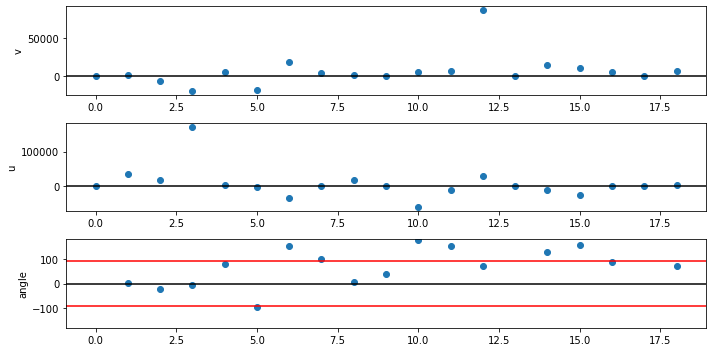

In [39]:
fig, axs = plt.subplots(3,1, figsize=(10,5))

dexes = np.arange(len(u))
axs[0].scatter(dexes, v)
axs[1].scatter(dexes, u)
axs[2].scatter(dexes, angle)

axs[0].set_ylabel('v')
axs[1].set_ylabel('u')
axs[2].set_ylabel('angle')

axs[2].set_ylim(-180, 180)
axs[2].axhline(-90, color='r')
axs[2].axhline(90, color='r')
xlim = axs[0].get_xlim()
axs[2].set_xlim(xlim)

for ax in axs:
    ax.axhline(0, color='k')

plt.tight_layout()

North-West    
North-East    
South-East    
South-West

Okay. After staring at that for nearly an hour, I can say confidently that it is correct.

In [43]:
def get_direction(u,v):
    direction = []
    for u_el, v_el in zip(u, v):
        
        if u_el < 0:
            if v_el > 0:
                angle = np.arctan(v_el/u_el)*(180/np.pi) + 180
                direction.append(angle)
            else:
                angle = -180 + 1*np.arctan(v_el/u_el)*(180/np.pi)
                direction.append(angle)
        else:
            angle = np.arctan(v_el/u_el)*(180/np.pi)
            direction.append(angle)
                
    return np.array(direction)

In [60]:
paired_ds = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/usdm_spi_paired.nc')
usdm_dates = paired_ds['USDM Date'].values
spi_dates = paired_ds['SPI Date'].values

/tmp/ipykernel_550638/2582263740.py:13: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arctan(v_el/u_el)*(180/np.pi)


Text(0.5, 0, 'Time')

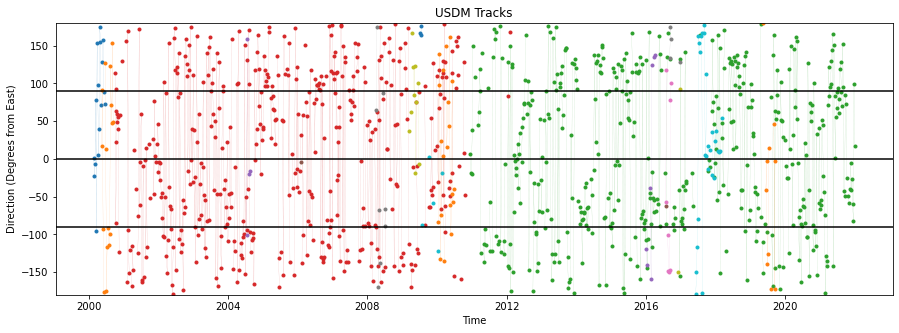

In [59]:
fig, ax = plt.subplots(figsize=(15,5))

u_tracks = usdm_dtd['u']
v_tracks = usdm_dtd['v']
t_tracks = usdm_dtd['t']
dir_tracks = [get_direction(u, v) for u, v in zip(u_tracks, v_tracks)]

for t_track, dir_track in zip(t_tracks, dir_tracks):
    ax.plot(usdm_dates[t_track], dir_track, linestyle='--', marker='.', linewidth=0.1)

ax.set_ylim(-180, 180)
ax.axhline(0, color='k')
ax.axhline(90, color='k')
ax.axhline(-90, color='k')
ax.set_title('USDM Tracks')
ax.set_ylabel('Direction (Degrees from East)')
ax.set_xlabel('Time')

Text(0.5, 0, 'Time')

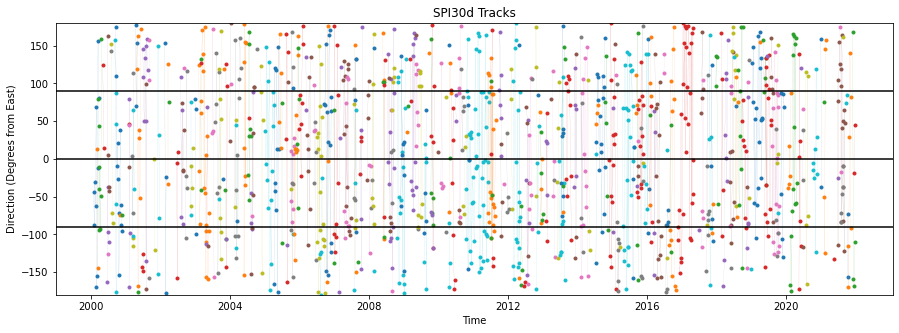

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

u_tracks = spi30d_dtd['u']
v_tracks = spi30d_dtd['v']
t_tracks = spi30d_dtd['t']
dir_tracks = [get_direction(u, v) for u, v in zip(u_tracks, v_tracks)]

for t_track, dir_track in zip(t_tracks, dir_tracks):
    ax.plot(spi_dates[t_track], dir_track, linestyle='--', marker='.', linewidth=0.1)

ax.set_ylim(-180, 180)
ax.axhline(0, color='k')
ax.axhline(90, color='k')
ax.axhline(-90, color='k')
ax.set_title('SPI30d Tracks')
ax.set_ylabel('Direction (Degrees from East)')
ax.set_xlabel('Time')

Text(0.5, 0, 'Time')

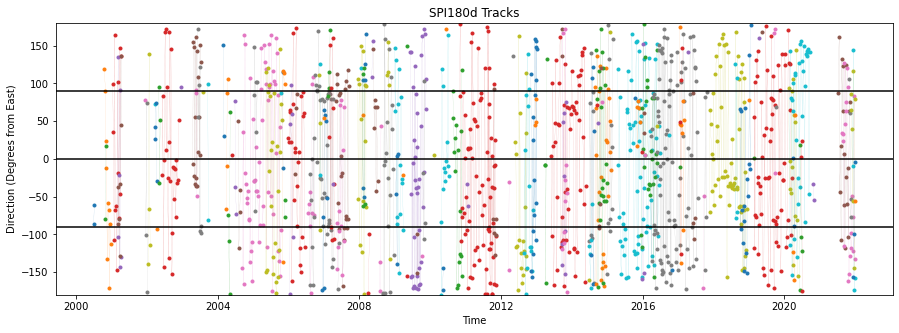

In [62]:
fig, ax = plt.subplots(figsize=(15,5))

u_tracks = spi180d_dtd['u']
v_tracks = spi180d_dtd['v']
t_tracks = spi180d_dtd['t']
dir_tracks = [get_direction(u, v) for u, v in zip(u_tracks, v_tracks)]

for t_track, dir_track in zip(t_tracks, dir_tracks):
    ax.plot(spi_dates[t_track], dir_track, linestyle='--', marker='.', linewidth=0.1)

ax.set_ylim(-180, 180)
ax.axhline(0, color='k')
ax.axhline(90, color='k')
ax.axhline(-90, color='k')
ax.set_title('SPI180d Tracks')
ax.set_ylabel('Direction (Degrees from East)')
ax.set_xlabel('Time')